# The Flash Loan Attack Analysis (FAA) Framework

## Importing Blockchain Data

In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt

### Overall Transaction

In [2]:
transaction_df = pd.read_csv("txlist_data.csv")

transaction_df

,blockNumber,timeStamp,hash,nonce,blockHash,transactionIndex,from,to,value,gas,gasPrice,isError,txreceipt_status,input,contractAddress,cumulativeGasUsed,gasUsed,confirmations,methodId,functionName
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,65,0xebc6bd6ac2c9ad4adf4ba57e9f709b8b9cf03c40,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,0,3656990,89000000000,0,1,0xb8e7c2fa,NaN,6231822,2339018,6467692,0xb8e7c2fa,NaN


In [3]:
# We know from inspecting the etherscan website that this is the correct transaction, but we will still check the timestamp matches the date of the warp finance attack
print("The date of the warp finance flash loan attack was the 17th of December 2020")
timestamp = transaction_df["timeStamp"][0]
datetime_obj = datetime.fromtimestamp(timestamp)
print(f"The timestamp of {timestamp} converts to datetime: {datetime_obj} UTC (GMT)")

The date of the warp finance flash loan attack was the 17th of December 2020
The timestamp of 1608243881 converts to datetime: 2020-12-17 22:24:41 UTC (GMT)


### Internal Transactions

In [4]:
internal_transactions_df = pd.read_csv("txlistinternal_data.csv")

internal_transactions_df

,blockNumber,timeStamp,hash,from,to,value,contractAddress,input,type,gas,gasUsed,traceId,isError,errCode
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,1462819418141686758539,NaN,NaN,call,2300,41,2_1_2_1_2_1_31_0,0,NaN


### Token Transfers

In [5]:
token_transfers_df = pd.read_csv("tokentx_data.csv")

token_transfers_df.head()

,blockNumber,timeStamp,hash,nonce,blockHash,from,contractAddress,to,value,tokenName,tokenSymbol,tokenDecimal,transactionIndex,gas,gasPrice,gasUsed,cumulativeGasUsed,input,confirmations
0,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,90409013949210977199603,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
1,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,82798403238691593953288,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
2,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,96092504596377425124746,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
3,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2900029981390875168951633,Dai Stablecoin,DAI,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255
4,11473330,1608243881,0x8bb8dc5c7c830bac85fa48acad2505e9300a91c3ff23...,4,0xace8f027885d93d734e046661df5e51d96d21d78d42c...,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,76436763597706555986902,Wrapped Ether,WETH,18,65,3656990,89000000000,2339018,6231822,deprecated,6434255


In [6]:
# Removing columns that aren't relevant to the analysis
columns_to_drop = ["blockNumber", "timeStamp", "hash", "nonce", "blockHash", "tokenName", "transactionIndex", "gas", "gasPrice", "gasUsed", "cumulativeGasUsed", "input", "confirmations"]

token_transfers_df = token_transfers_df.drop(columns=columns_to_drop, axis=1)
token_transfers_df.head()

,from,contractAddress,to,value,tokenSymbol,tokenDecimal
0,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,90409013949210977199603,WETH,18
1,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,82798403238691593953288,WETH,18
2,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,96092504596377425124746,WETH,18
3,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2900029981390875168951633,DAI,18
4,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,76436763597706555986902,WETH,18


In [7]:
# Adding a column to show the value of the transfer in Wei and in the standard token
token_transfers_df = token_transfers_df.rename(columns={"value": "smallestDenominationQuantity"})

# Converting columns to floats (numbers are too large for ints according to OverflowError)
token_transfers_df["smallestDenominationQuantity"] = token_transfers_df["smallestDenominationQuantity"].astype(float)
token_transfers_df["tokenDecimal"] = token_transfers_df["tokenDecimal"].astype(float)

# Creating new column
token_transfers_df["tokenQuantity"] = token_transfers_df["smallestDenominationQuantity"] / (10 ** token_transfers_df["tokenDecimal"])

# Moving the tokenQuantity next to the smallestDenomQuantity
new_column_position = 4
column_names = list(token_transfers_df.columns)
column_names.insert(new_column_position, column_names.pop(column_names.index("tokenQuantity")))
token_transfers_df = token_transfers_df[column_names]

# Removing tokenDecimal as it is no longer useful
token_transfers_df = token_transfers_df.drop(columns="tokenDecimal")

token_transfers_df.head()

,from,contractAddress,to,smallestDenominationQuantity,tokenQuantity,tokenSymbol
0,0xbb2b8038a1640196fbe3e38816f3e67cba72d940,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,9.040901e+22,9.040901e+04,WETH
1,0xb4e16d0168e52d35cacd2c6185b44281ec28c9dc,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,8.279840e+22,8.279840e+04,WETH
2,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,9.609250e+22,9.609250e+04,WETH
3,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0x6b175474e89094c44da98b954eedeac495271d0f,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,2.900030e+24,2.900030e+06,DAI
4,0x1e0447b19bb6ecfdae1e4ae1694b0c3659614e4e,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,0xdf8bee861227ffc5eea819c332a1c170ae3dbacb,7.643676e+22,7.643676e+04,WETH


In [8]:
# Creating a dictionary to translate hex addresses into known tokens, DApps, and contracts
address_dictionary = {
    "0xeBc6bD6aC2C9AD4adf4BA57E9F709b8B9CF03C40": "Attacker",
    "0xdF8BEE861227FFC5EEA819C332A1C170Ae3dbACb": "Attacker's Contract",
    "0xBb2b8038a1640196FbE3e38816F3e67Cba72D940": "Uniswap V2: WBTC-WETH LP",
    "0xB4e16d0168e52d35CaCD2c6185b44281Ec28C9Dc": "Uniswap V2: USDC-WETH LP",
    "0x0d4a11d5EEaaC28EC3F61d100daF4d40471f1852": "Uniswap V2: USDT-WETH LP",
    "0xA478c2975Ab1Ea89e8196811F51A7B7Ade33eB11": "Uniswap V2: WETH-DAI LP",
    "0x1E0447b19BB6EcFdAe1e4AE1694b0C3659614e4e": "dYdX: Solo Margin",
    "0x0000000000000000000000000000000000000000": "Null",  # Used by UniSwap for LP token minting
    "0x13db1CB418573f4c3A2ea36486F0E421bC0D2427": "Warp Vault LP",
    "0xae465FD39B519602eE28F062037F7B9c41FDc8cF": "Warp Vault SC 1",
    "0x6046c3Ab74e6cE761d218B9117d5c63200f4b406": "Warp Vault SC 2",
    "0x397FF1542f962076d0BFE58eA045FfA2d347ACa0": "SushiSwap: USDC/ETH LP",
    "0xC02aaA39b223FE8D0A0e5C4F27eAD9083C756Cc2": "Wrapped Ether",
    "0x6B175474E89094C44Da98b954EedeAC495271d0F": "Dai Stablecoin",
    "0xA0b86991c6218b36c1d19D4a2e9Eb0cE3606eB48": "USD Coin"
}

# Converting dictionary keys to lowercase
address_dictionary = {key.lower(): value for key, value in address_dictionary.items()}

# Replacing addresses with corresponding public names from the dictionary
token_transfers_df = token_transfers_df.replace(address_dictionary)

token_transfers_df

,from,contractAddress,to,smallestDenominationQuantity,tokenQuantity,tokenSymbol
0,Uniswap V2: WBTC-WETH LP,Wrapped Ether,Attacker's Contract,9.040901e+22,9.040901e+04,WETH
1,Uniswap V2: USDC-WETH LP,Wrapped Ether,Attacker's Contract,8.279840e+22,8.279840e+04,WETH
2,Uniswap V2: USDT-WETH LP,Wrapped Ether,Attacker's Contract,9.609250e+22,9.609250e+04,WETH
3,dYdX: Solo Margin,Dai Stablecoin,Attacker's Contract,2.900030e+24,2.900030e+06,DAI
4,dYdX: Solo Margin,Wrapped Ether,Attacker's Contract,7.643676e+22,7.643676e+04,WETH
5,Attacker's Contract,Dai Stablecoin,Uniswap V2: WETH-DAI LP,2.900030e+24,2.900030e+06,DAI
6,Attacker's Contract,Wrapped Ether,Uniswap V2: WETH-DAI LP,4.519641e+21,4.519641e+03,WETH
7,Null,Uniswap V2: WETH-DAI LP,Attacker's Contract,9.434934e+22,9.434934e+04,UNI-V2
8,Attacker's Contract,Uniswap V2: WETH-DAI LP,Warp Vault LP,9.434934e+22,9.434934e+04,UNI-V2
9,Attacker's Contract,Wrapped Ether,Uniswap V2: WETH-DAI LP,3.412170e+23,3.412170e+05,WETH


## Damage Model Formulation (Warp Finance)

### Defining Constants

In [9]:
# The quantity of DAI borrowed from dYdX
F_0 = token_transfers_df.loc[(token_transfers_df["from"] == "dYdX: Solo Margin") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
print(f"F_0: DAI borrowed from dYdX = {F_0}")

# The quantity of WETH borrowed from dYdX
F_1_dydx = token_transfers_df.loc[(token_transfers_df["from"] == "dYdX: Solo Margin") & (token_transfers_df["tokenSymbol"] == "WETH"), "tokenQuantity"].iloc[0]
print(f"F_1_dydx: WETH borrowed from dYdX = {F_1_dydx}")

# The quantity of WETH borrowed from UniSwap
F_1_uni = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WBTC-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]\
    + token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: USDC-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]\
    + token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: USDT-WETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
print(f"F_1_uni: WETH borrowed from UniSwap = {F_1_uni}")

# The quantity of WETH borrowed from Uniswap and dYdX
F_1 = F_1_uni + F_1_dydx
print(f"F_1: WETH borrowed from Uniswap and dYdX= {F_1}\n")

F_0: DAI borrowed from dYdX = 2900029.981390875
F_1_dydx: WETH borrowed from dYdX = 76436.76359770655
F_1_uni: WETH borrowed from UniSwap = 269299.92178428
F_1: WETH borrowed from Uniswap and dYdX= 345736.68538198655



In [10]:
# The quantity of DAI in the pool before providing liquidity
r_0 = 58010988.362646327044546669  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of WETH in the pool before providing liquidity
r_1 = 90409.013949210977199604  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of DAI provided to the Uniswap WETH-DAI pool
s_0 = F_0

# The quantity of WETH-DAI LP tokens before providing liquidity
lp = 1887324.80  # The endpoint needed to do this is Etherscan PRO API only

# Time Weighted Average Price of DAI retrieved from the DAI-USDC Uniswap pool
twap_0 = 1  # TODO: Use Uniswap TheGraph to find this

# Time Weighted Average Price of WETH retrieved from the WETH-USDC Uniswap pool
twap_1 = 585  # TODO: Use Uniswap TheGraph to find this

# The amount of DAI available in the Warp Finance vault
V_dai = 3862646.608579660094744529 # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The amount of USDC available in the Warp Finance vault
V_usdc = 3917983.816718  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of WETH in the USDC-WETH SushiSwap pool
r_weth = 110167.374111420695655184  # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

# The quantity of USDC in the USDC-WETH SushiSwap pool
r_usdc = 70837678.781592 # Used Etherscan account balance checker (ETH) at block 11473329 not 11473330 as we want the value before the attack has taken place

### Defining the Damage Function

In [11]:
def damage_model(model, F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc):
    # The quantity of WETH provided to the WETH-DAI pool
    s_1 = (r_1 / r_0) * s_0
    #print(f"s_1 = {s_1}")

    # The quantity of WETH-DAI LP tokens minted upon providing liquidity, which were then all used as collateral
    D = lp * (F_0 / r_0)
    #print(f"D = {D}")

    # The quantity of WETH-DAI LP tokens after providing liquidity
    LP = lp + D
    #print(f"LP = {LP}")

    # The quantity of DAI in the pool after providing liquidity (i.e. the reserve)
    R_0 = r_0 + s_0
    #print(f"R_0 = {R_0}")

    # The quantity of WETH in the pool after providing liquidity (i.e. the reserve)
    R_1 = r_1 + s_1
    #print(f"R_1 = {R_1}")

    # LP price calculation
    if model == "Warp Finance":
        # The LP token price calculated using the TWAP of DAI and WETH and their real time reserves
        P_LP = (R_0 * twap_0 + R_1 * twap_1) / LP
    elif model == "Fair Reserve":
        k = R_0 * R_1
        P_LP =  (2 * (k * twap_1 * twap_0) ** 0.5) / LP
    #print(f"P_LP = {P_LP}")

    # The Warp finance borrowing limit when the LP token is used as collateral
    B = (P_LP * D) / 1.5
    #print(f"B = {B}")

    # The remaining WETH after supplying liquidity (s_1) that is then exchanged for DAI
    In_1 = F_1 - s_1
    #print(f"In_1 = {In_1}")

    # The DAI received in exchange for all the remaining WETH at a 0.3% fee
    Out_0 = (R_0 / (R_1 + 0.997 * In_1)) * 0.997 * In_1
    #print(f"Out_0 = {Out_0}")

    # The new reserve quantity of DAI tokens in the WETH-DAI liquidity pool
    R_0_new = R_0 - Out_0
    #print(f"R_0_new = {R_0_new}")

    # The new reserve quantity of WETH tokens in the WETH-DAI liquidity pool
    R_1_new = R_1 + In_1
    #print(f"R_1_new = {R_1_new}")

    # Calculating the new value of the LP token
    if model == "Warp Finance":
        # The new value of the LP token based on the new reserve quantities
        P_LP_new = (R_0_new * twap_0 + R_1_new * twap_1) / LP
    elif model == "Fair Reserve":
        P_LP_new =  P_LP
    #print(f"P_LP_new = {P_LP_new}")

    # The new borrow limit on the Warp Finance protocol based on this new, apparent LP value
    B_new = (P_LP_new * D) / 1.5
    #print(f"B_new = {B_new}")

    # The amount of DAI borrowed using all LP tokens at this false value as collateral
    B_dai = min(B_new, V_dai)
    #print(f"B_dai = {B_dai}")

    # The amount of USDC the attacker can borrow using the LP as collateral after clearing out the DAI vault
    B_usdc = min(B_new - B_dai, V_usdc)
    #print(f"B_usdc = {B_usdc}")

    # The quantity of DAI remaining after repaying the dYdX flash loan for the attacker to exchange for WETH
    In_0 = Out_0 + B_dai - F_0
    #print(f"In_0 = {In_0}")

    # The quantity of WETH received in exchange for this remaining DAI with a 0.3% fee on Uniswap
    Out_weth_us = (R_1_new / (R_0_new + 0.997 * In_0)) * 0.997 * In_0
    #print(f"Out_weth_us = {Out_weth_us}")

     # The quantity of WETH received in exchange for USDC with a 0.3% fee on SushiSwap
    Out_weth_ss = (r_weth / (r_usdc + 0.997 * B_usdc)) * 0.997 * B_usdc
    #print(f"Out_weth_ss = {Out_weth_ss}")

    # The quantity of WETH borrowed from UniSwap by the attacker
    # If borrowing in total less than dYdX has available, attacker would only use dYdX and F_1_uni would be 0. Writing like this allows iteration through F_1 quantities for plotting later
    F_1_uni = max(F_1 - F_1_dydx, 0)
    #print(f"F_1_uni = {F_1_uni}")

    # Calculating the fee charged by UniSwap
    c = F_1_uni * 0.00301114
    #print(f"c = {c}")

    # The profit gained by the attacker
    profit = Out_weth_us + Out_weth_ss - F_1 - c  # Max ruins the plot
    #profit = max(Out_weth_us + Out_weth_ss - F_1 - c, 0)
    #print(f"profit = {profit}")

    # The damage caused to Warp Finance pre liquidation of LP tokens
    pre_dmg = B_dai + B_usdc
    #print(f"pre damage = {pre_dmg}")

    # The damage caused to Warp Finance post liquidation of LP tokens
    post_dmg = pre_dmg - D*P_LP
    #post_dmg = max(pre_dmg - D*P_LP, 0)  # Max ruins the plot
    #print(f"post damage = {post_dmg}")

    return s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit, pre_dmg, post_dmg

## Damage Model Validation (Warp Finance)

In [12]:
s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit_warp, pre_dmg, post_dmg = damage_model("Warp Finance", F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc)

In [13]:
# Defining a function to check that each variable is within 0.01% of the real world data
def is_valid(var_str, var, true_var):
    diff = abs(true_var - var)
    if true_var * 1.0001 >= var >= true_var * 0.9999:
        print(f"VALID: The calculated value of {var_str} is within 0.01% of the transaction data value, the difference between them is {diff}\n")
    else:
        print(f"INVALID: The calculated value of {var_str} is not within 0.01% of the true value, the difference between them is {diff}\n")

In [14]:
# Validating the calculated quantity of DAI provided to the Uniswap WETH-DAI pool
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[0]
is_valid("s_0", s_0, data)

# Validating the calculated quantity of WETH provided to the Uniswap WETH-DAI pool
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[0]
is_valid("s_1", s_1, data)

# Validating the calculated quantity of Uniswap LP tokens received by the attacker
data = token_transfers_df.loc[(token_transfers_df["from"] == "Null") & (token_transfers_df["tokenSymbol"] == "UNI-V2") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("D", D, data)


VALID: The calculated value of s_0 is within 0.01% of the transaction data value, the difference between them is 0.0

VALID: The calculated value of s_1 is within 0.01% of the transaction data value, the difference between them is 0.0

VALID: The calculated value of D is within 0.01% of the transaction data value, the difference between them is 0.00017081147234421223



In [15]:
# Validating the calculated quantity of WETH exchanged for DAI using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[1]
is_valid("In_1", In_1, data)

# Validating the calculated quantity of DAI received in exchange for the WETH using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WETH-DAI LP") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_0", Out_0, data)

VALID: The calculated value of In_1 is within 0.01% of the transaction data value, the difference between them is 5.820766091346741e-11

VALID: The calculated value of Out_0 is within 0.01% of the transaction data value, the difference between them is 7.450580596923828e-09



In [16]:
# Validating the calculated quantity of USDC received from the Warp Finance loan
data = token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 1") & (token_transfers_df["tokenSymbol"] == "USDC") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("B_usdc", B_usdc, data)

# Validating the calculated quantity of DAI received from the Warp Finance loan
data = token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 2") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("B_dai", B_dai, data)

VALID: The calculated value of B_usdc is within 0.01% of the transaction data value, the difference between them is 9.997747838497162e-07

VALID: The calculated value of B_dai is within 0.01% of the transaction data value, the difference between them is 0.0



In [17]:
# Validating the calculated quantity of DAI exchanged for WETH using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Attacker's Contract") & (token_transfers_df["tokenSymbol"] == "DAI") & (token_transfers_df["to"] == "Uniswap V2: WETH-DAI LP"), "tokenQuantity"].iloc[1]
is_valid("In_0", In_0, data)

# Validating the calculated quantity of WETH received in exchange for the DAI using the WETH-DAI Uniswap LP
data = token_transfers_df.loc[(token_transfers_df["from"] == "Uniswap V2: WETH-DAI LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_weth_us", Out_weth_us, data)

# Validating the calculated quantity of WETH received for the remaining USDC (post uniswap loan repayment) from SushiSwap
data = token_transfers_df.loc[(token_transfers_df["from"] == "SushiSwap: USDC/ETH LP") & (token_transfers_df["tokenSymbol"] == "WETH") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("Out_weth_ss", Out_weth_ss, data)

VALID: The calculated value of In_0 is within 0.01% of the transaction data value, the difference between them is 1.4901161193847656e-08

VALID: The calculated value of Out_weth_us is within 0.01% of the transaction data value, the difference between them is 5.820766091346741e-11

VALID: The calculated value of Out_weth_ss is within 0.01% of the transaction data value, the difference between them is 1.393345883116126e-09



In [18]:
# Validating the total profit made by the attacker
data = int(internal_transactions_df["value"].iloc[0]) / 10 ** 18
is_valid("profit", profit_warp, data)

# Validating the total damage caused by the attacker before liquidation
data = token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 1") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0] + token_transfers_df.loc[(token_transfers_df["from"] == "Warp Vault SC 2") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0]
is_valid("pre-liquidation damage", pre_dmg, data)

# Validating the total damage caused by the attacker after liquidation
data -= token_transfers_df.loc[(token_transfers_df["from"] == "Null") & (token_transfers_df["to"] == "Attacker's Contract"), "tokenQuantity"].iloc[0] * P_LP  # data is still the same as the previous check, no need to refetch it
is_valid("post-liquidation damage", post_dmg, data)

VALID: The calculated value of profit is within 0.01% of the transaction data value, the difference between them is 1.127353243646212e-06

VALID: The calculated value of pre-liquidation damage is within 0.01% of the transaction data value, the difference between them is 1.000240445137024e-06

VALID: The calculated value of post-liquidation damage is within 0.01% of the transaction data value, the difference between them is 0.010035977698862553



In [19]:
s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit_warp, pre_dmg, post_dmg = damage_model("Warp Finance", F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc)

### Total Value Locked Plot

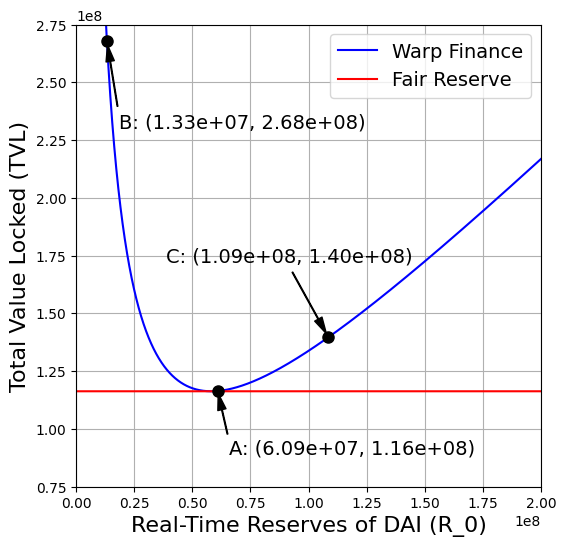

In [23]:
# Range of r_0 values
r_0_range = range(1, 200000001, 100)

# Constant Product
k = R_0 * R_1

# Initialize empty lists to store TVL values
TVL_values_warp = []
TVL_values_fair = []

for x in r_0_range:
    # Defining the TVL equation for the warp finance model, where x is r_0
    TVL_warp = x * twap_0 + ((k * twap_1) / x)

    # Defining the TVL equation for the fair reserve model
    TVL_fair = 2 * ((k * twap_0 * twap_1) ** 0.5)

    # Append to list
    TVL_values_warp.append(TVL_warp)
    TVL_values_fair.append(TVL_fair)

# Plotting the TVL data for both models
plt.figure(figsize=(6, 6))
plt.plot(r_0_range, TVL_values_warp, color="b", label="Warp Finance")
plt.plot(r_0_range, TVL_values_fair, color="r", label="Fair Reserve")
plt.xlabel("Real-Time Reserves of DAI (R_0)", fontsize=16)
plt.ylabel("Total Value Locked (TVL)", fontsize=16)
plt.legend(fontsize=14, loc="lower right")

plt.grid()
plt.xlim(0, 2e+08)
plt.ylim(0.75e+08, 2.75e+08)

# Point where R_0 = 60,911,018.34
target_r_0 = 60911018.34
target_tvl = np.interp(target_r_0, r_0_range, TVL_values_warp)
plt.plot(target_r_0, target_tvl, "ko", markersize=8)
plt.annotate(f"A: ({target_r_0:.2e}, {target_tvl:.2e})",
             xy=(target_r_0, target_tvl),
             xytext=(target_r_0 + 4750000, target_tvl - 25000000),
             arrowprops=dict(facecolor="black", shrink=0.05, width=0.5, headwidth=6),
             fontsize=14,
             color="black",
             verticalalignment="center")

# Add blue marker at R'_0 = 13,288,687.80 (Warp finance attack)
target_r_0 = 13288687.80
target_tvl = np.interp(target_r_0, r_0_range, TVL_values_warp)
plt.plot(target_r_0, target_tvl, "ko", markersize=8)
plt.annotate(f"B: ({target_r_0:.2e}, {target_tvl:.2e})",
             xy=(target_r_0, target_tvl),
             xytext=(target_r_0 + 5000000, target_tvl - 35000000),
             arrowprops=dict(facecolor="black", shrink=0.05, width=0.5, headwidth=6),
             fontsize=14,
             color="black",
             verticalalignment="center",
             horizontalalignment="left")

# Add blue marker at R'_0 = 108,533,348.90 (Warp finance attack if they added DAI and not WETH)
target_r_0 = 60911018.34 + (60911018.34 - 13288687.80)
target_tvl = np.interp(target_r_0, r_0_range, TVL_values_warp)
plt.plot(target_r_0, target_tvl, "ko", markersize=8)
plt.annotate(f"C: ({target_r_0:.2e}, {target_tvl:.2e})",
             xy=(target_r_0, target_tvl),
             xytext=(target_r_0 - 70000000, target_tvl + 35000000),
             arrowprops=dict(facecolor="black", shrink=0.05, width=0.5, headwidth=6),
             fontsize=14,
             color="black",
             verticalalignment="center",
             horizontalalignment="left")

plt.legend(fontsize=14, loc="upper right")
plt.show()

## Fair Reserve Damage Model Simulation (Mitigation Test)

In [ ]:
def damage_model(model, F_0, F_1, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc):
    # The quantity of WETH provided to the WETH-DAI pool
    s_1 = (r_1 / r_0) * s_0
    #print(f"s_1 = {s_1}")

    # The quantity of WETH-DAI LP tokens minted upon providing liquidity, which were then all used as collateral
    D = lp * (F_0 / r_0)
    #print(f"D = {D}")

    # The quantity of WETH-DAI LP tokens after providing liquidity
    LP = lp + D
    #print(f"LP = {LP}")

    # The quantity of DAI in the pool after providing liquidity (i.e. the reserve)
    R_0 = r_0 + s_0
    #print(f"R_0 = {R_0}")

    # The quantity of WETH in the pool after providing liquidity (i.e. the reserve)
    R_1 = r_1 + s_1
    #print(f"R_1 = {R_1}")

    # LP price calculation
    if model == "Warp Finance":
        # The LP token price calculated using the TWAP of DAI and WETH and their real time reserves
        P_LP = (R_0 * twap_0 + R_1 * twap_1) / LP
    elif model == "Fair Reserve":
        k = R_0 * R_1
        P_LP =  (2 * (k * twap_1 * twap_0) ** 0.5) / LP
    #print(f"P_LP = {P_LP}")

    # The Warp finance borrowing limit when the LP token is used as collateral
    B = (P_LP * D) / 1.5
    #print(f"B = {B}")

    # The remaining WETH after supplying liquidity (s_1) that is then exchanged for DAI
    In_1 = F_1 - s_1
    #print(f"In_1 = {In_1}")

    # The DAI received in exchange for all the remaining WETH at a 0.3% fee
    Out_0 = (R_0 / (R_1 + 0.997 * In_1)) * 0.997 * In_1
    #print(f"Out_0 = {Out_0}")

    # The new reserve quantity of DAI tokens in the WETH-DAI liquidity pool
    R_0_new = R_0 - Out_0
    #print(f"R_0_new = {R_0_new}")

    # The new reserve quantity of WETH tokens in the WETH-DAI liquidity pool
    R_1_new = R_1 + In_1
    #print(f"R_1_new = {R_1_new}")

    # Calculating the new value of the LP token
    if model == "Warp Finance":
        # The new value of the LP token based on the new reserve quantities
        P_LP_new = (R_0_new * twap_0 + R_1_new * twap_1) / LP
    elif model == "Fair Reserve":
        P_LP_new =  P_LP
    #print(f"P_LP_new = {P_LP_new}")

    # The new borrow limit on the Warp Finance protocol based on this new, apparent LP value
    B_new = (P_LP_new * D) / 1.5
    #print(f"B_new = {B_new}")

    # The amount of DAI borrowed using all LP tokens at this false value as collateral
    B_dai = min(B_new, V_dai)
    #print(f"B_dai = {B_dai}")

    # The amount of USDC the attacker can borrow using the LP as collateral after clearing out the DAI vault
    B_usdc = min(B_new - B_dai, V_usdc)
    #print(f"B_usdc = {B_usdc}")

    # The quantity of DAI remaining after repaying the dYdX flash loan for the attacker to exchange for WETH
    In_0 = Out_0 + B_dai - F_0
    #print(f"In_0 = {In_0}")

    # The quantity of WETH received in exchange for this remaining DAI with a 0.3% fee on Uniswap
    Out_weth_us = (R_1_new / (R_0_new + 0.997 * In_0)) * 0.997 * In_0
    #print(f"Out_weth_us = {Out_weth_us}")

     # The quantity of WETH received in exchange for USDC with a 0.3% fee on SushiSwap
    Out_weth_ss = (r_weth / (r_usdc + 0.997 * B_usdc)) * 0.997 * B_usdc
    #print(f"Out_weth_ss = {Out_weth_ss}")

    # The quantity of WETH borrowed from UniSwap by the attacker
    # If borrowing in total less than dYdX has available, attacker would only use dYdX and F_1_uni would be 0. Writing like this allows iteration through F_1 quantities for plotting later
    F_1_uni = max(F_1 - F_1_dydx, 0)
    #print(f"F_1_uni = {F_1_uni}")

    # Calculating the fee charged by UniSwap
    c = F_1_uni * 0.00301114
    #print(f"c = {c}")

    # The profit gained by the attacker
    profit = Out_weth_us + Out_weth_ss - F_1 - c  # Max ruins the plot
    #profit = max(Out_weth_us + Out_weth_ss - F_1 - c, 0)
    #print(f"profit = {profit}")

    # The damage caused to Warp Finance pre liquidation of LP tokens
    pre_dmg = B_dai + B_usdc
    #print(f"pre damage = {pre_dmg}")

    # The damage caused to Warp Finance post liquidation of LP tokens
    post_dmg = pre_dmg - D*P_LP
    #post_dmg = max(pre_dmg - D*P_LP, 0)  # Max ruins the plot
    #print(f"post damage = {post_dmg}")

    return s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit, pre_dmg, post_dmg

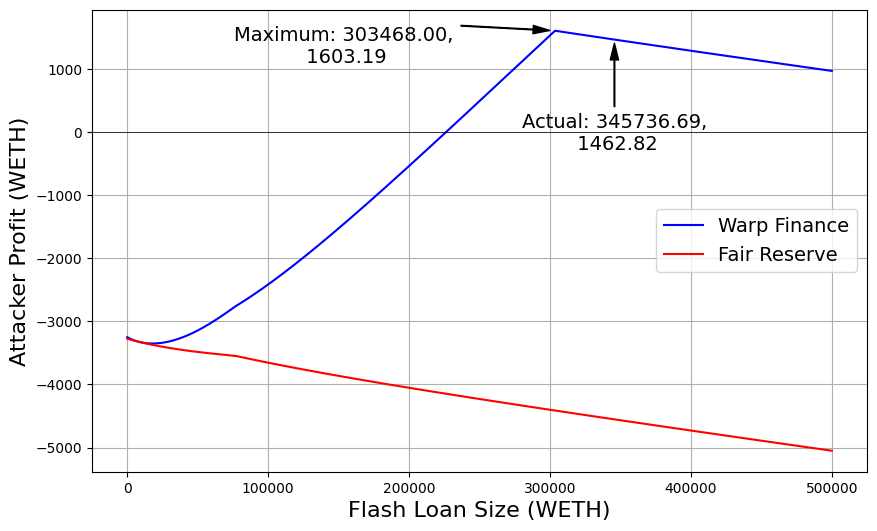

In [24]:
# Define a range of F_1 values from 0 to 500,000
F_1_values = range(0, 500000)

# Initialize empty lists to store dmg values for both models
profit_values_warp = []
profit_values_fair = []

# Loop through the F_1 values and calculate dmg for each value for both models
for F_1_value in F_1_values:
    # Calculate dmg for "Warp Finance" model
    s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit_warp, pre_warp, post_warp = damage_model("Warp Finance", F_0, F_1_value, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc)
    profit_values_warp.append(profit_warp)

    # Calculate dmg for "Fair Reserve" model
    s_1, D, LP, R_0, R_1, P_LP, B, In_1, Out_0, R_0_new, R_1_new, P_LP_new, B_new, B_dai, B_usdc, In_0, Out_weth_us, Out_weth_ss, c, profit_fair, pre_fair, post_fair = damage_model("Fair Reserve", F_0, F_1_value, r_0, r_1, s_0, lp, twap_0, twap_1, V_dai, V_usdc, r_weth, r_usdc)
    profit_values_fair.append(profit_fair)

# Plot the DMG vs F_1 continuous line plot for both models
plt.figure(figsize=(10, 6))
plt.plot(F_1_values, profit_values_warp, color="b", label="Warp Finance")
plt.plot(F_1_values, profit_values_fair, color="r", label="Fair Reserve")
plt.xlabel("Flash Loan Size (WETH)", fontsize=16)
plt.ylabel("Attacker Profit (WETH)", fontsize=16)
plt.legend(fontsize=14, loc="center right")

# Add horizontal line at y = 0 to make the x-axis more distinct across 0
plt.axhline(0, color="black", linewidth=0.5, linestyle="-")

# Find the index of the maximum value in dmg_values_warp
max_index_warp = profit_values_warp.index(max(profit_values_warp))

# Annotate the maximum point below the line
plt.annotate(f"Maximum: {F_1_values[max_index_warp]:.2f},\n {max(profit_values_warp):.2f}",
             xy=(F_1_values[max_index_warp], max(profit_values_warp)),
             xytext=(F_1_values[max_index_warp] - 150000, max(profit_values_warp) - 500),
             arrowprops=dict(facecolor="black", shrink=0.05, width=0.5, headwidth=6),
             fontsize=14,
             horizontalalignment="center")

plt.annotate("Actual: 345736.69,\n 1462.82",
             xy=(345736.68538198655, 1462.819418141686758539),
             xytext=(345736.68538198655, 1462.819418141686758539 - 1750),
             arrowprops=dict(facecolor="black", shrink=0.05, width=0.5, headwidth=6),
             fontsize=14,
             horizontalalignment="center")

plt.grid()
plt.show()

## Internal Parameter Adjustment

## External Parameter Adjustment